In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [7]:
from importlib import reload
import utils
reload(utils)

<module 'utils' from '/home/koonwen/YNC/Capstone/domainslib/benchmarks/utils.py'>

## Skiplist

In [8]:
import csv
def dump_results_to_file(file, results):
    with open(file, 'w', newline='') as csvfile:
        fieldnames = [
        'domains', 
        'skiplist-sequential', # 'skiplist-sequential-sd',
        'skiplist-batched', 'skiplist-batched-sd',
        'skiplist-coarse', 'skiplist-coarse-sd',
        'skiplist-lazy', 'skiplist-lazy-sd',
        'set-coarse', 'set-coarse-sd'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
        writer.writeheader()
        sequential_time = None
        for result in results:
            if not sequential_time:
                sequential_time = result['skiplist-sequential']
            result = result.copy()
            result['skiplist-sequential'] = sequential_time
            writer.writerow(result)

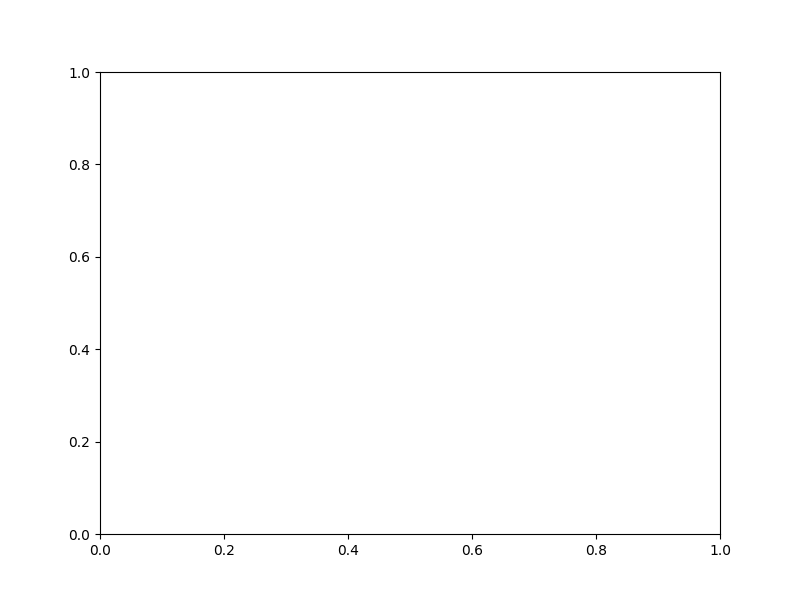

In [9]:
%matplotlib widget
fig, ax = utils.interactive_plot()

In [11]:
data_structures = [
    {'name': 'skiplist-batched', 'label': 'skiplist-batched', 'title': 'Skiplist (Batched)'},
    {'name': 'skiplist-sequential', 'label': 'skiplist-sequential', 'title': 'Skiplist (Sequential)'},
    {'name': 'skiplist-lazy', 'label': 'skiplist-lazy', 'title': 'Skiplist (Fine-Grained)'},
    {'name': 'set-coarse-grained', 'label': 'set-coarse', 'title': 'Vanilla Set (Coarse grained lock)'}
]

_,  results = utils.build_interactive_plot(fig, ax, data_structures,       
    {'count': 100_000, 'init_count': 1_000_000})

In [ ]:
dump_results_to_file('skiplist-inserts.csv', majority_reads_results)

## Btree

We declare the parameters for the B-tree as follows:

In [7]:
btree_branching_factor = 6
btree_init_count = 2_000_000

We define a utility function to dump results:

In [27]:
import csv
def dump_results_to_file(file, results):
    with open(file, 'w', newline='') as csvfile:
        fieldnames = [
        'domains', 
        'btree-sequential', # 'btree-sequential-sd',
        'btree-batched', 'btree-batched-sd',
        'btree-coarse', 'btree-coarse-sd',
        'map-coarse', 'map-coarse-sd'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
        writer.writeheader()
        sequential_time = None
        for result in results:
            if not sequential_time:
                sequential_time = result['btree-sequential']
            result = result.copy()
            result['btree-sequential'] = sequential_time
            writer.writerow(result)

### Inserts

We will evaluate the performance of the B-tree as we change the number of cores:

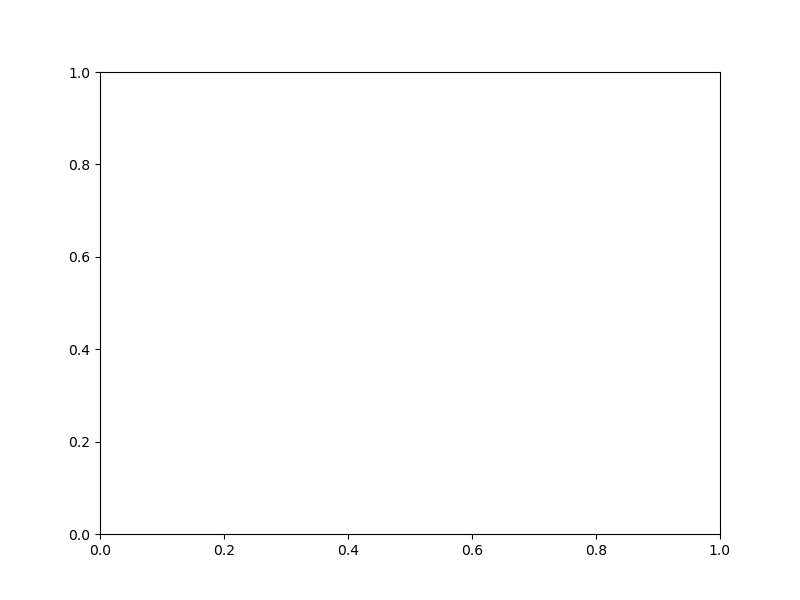

In [8]:
%matplotlib widget
fig, ax = utils.interactive_plot()

In [5]:
data_structures = [
    {'name': 'btree-sequential', 'label':'btree-sequential', 'title': 'B-tree (Sequential)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-batched', 'label': 'btree-batched', 'title': 'B-tree (Batched)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-coarse', 'label': 'btree-coarse', 'title': 'B-tree (Coarse-grained)', 'branching_factor': btree_branching_factor},
    {'name': 'map-coarse', 'label': 'map-coarse', 'title': 'Map (Coarse-grained)' }
]

_,  results = utils.build_interactive_plot(fig, ax, data_structures, {'count': 1_000_000, 'init_count': btree_init_count})

NameError: name 'btree_branching_factor' is not defined

In [13]:
import csv
insert_results = results
with open('insert-results.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'domains', 
        'btree-sequential', # 'btree-sequential-sd',
        'btree-batched', 'btree-batched-sd',
        'btree-coarse', 'btree-coarse-sd',
        'map-coarse', 'map-coarse-sd'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
    writer.writeheader()
    sequential_time = None
    for result in results:
        if not sequential_time:
            sequential_time = result['btree-sequential']
        result = result.copy()
        result['btree-sequential'] = sequential_time
        writer.writerow(result)

### Searches

We evaluate the performance of searches as well as we change the number of cores

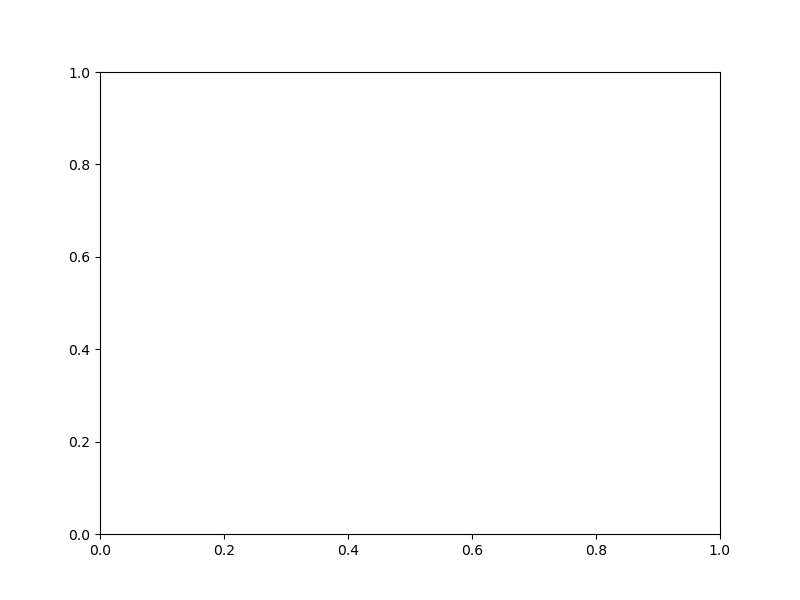

In [14]:
%matplotlib widget
fig, ax = utils.interactive_plot()

In [16]:
data_structures = [
    {'name': 'btree-sequential', 'label':'btree-sequential', 'title': 'B-tree (Sequential)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-batched', 'label': 'btree-batched', 'title': 'B-tree (Batched)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-coarse', 'label': 'btree-coarse', 'title': 'B-tree (Coarse-grained)', 'branching_factor': btree_branching_factor},
    {'name': 'map-coarse', 'label': 'map-coarse', 'title': 'Map (Coarse-grained)' }
]

_,  results = utils.build_interactive_plot(fig, ax, data_structures, {'count': 0, 'no_searches': 1_000_000, 'init_count': btree_init_count})

In [17]:
import csv
search_results = results
with open('search-results.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'domains', 
        'btree-sequential', # 'btree-sequential-sd',
        'btree-batched', 'btree-batched-sd',
        'btree-coarse', 'btree-coarse-sd',
        'map-coarse', 'map-coarse-sd'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
    writer.writeheader()
    sequential_time = None
    for result in results:
        if not sequential_time:
            sequential_time = result['btree-sequential']
        result = result.copy()
        result['btree-sequential'] = sequential_time
        writer.writerow(result)

### Diverse Workloads

Ilya suggests

- 90% reads 
- 50% reads

In [22]:
majority_reads_searches, majority_reads_inserts = int(0.9 * 1_000_000), int(0.1 * 1_000_000)
equal_reads_searches, equal_reads_inserts = int(0.5 * 1_000_000), int(0.5 * 1_000_000)

In [25]:
data_structures = [
    {'name': 'btree-sequential', 'label':'btree-sequential', 'title': 'B-tree (Sequential)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-batched', 'label': 'btree-batched', 'title': 'B-tree (Batched)', 'branching_factor': btree_branching_factor},
    {'name': 'btree-coarse', 'label': 'btree-coarse', 'title': 'B-tree (Coarse-grained)', 'branching_factor': btree_branching_factor},
    {'name': 'map-coarse', 'label': 'map-coarse', 'title': 'Map (Coarse-grained)' }
]

majority_reads_results = utils.build_results(data_structures, {'count': majority_reads_inserts, 'no_searches': majority_reads_searches, 'init_count': btree_init_count})

equal_reads_results = utils.build_results(data_structures, {'count': equal_reads_inserts, 'no_searches': equal_reads_searches, 'init_count': btree_init_count})

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [28]:
dump_results_to_file('btree-majority-reads.csv', majority_reads_results)

In [29]:
dump_results_to_file('btree-equal-reads.csv', equal_reads_results)